<a href="https://colab.research.google.com/github/agnivachakraborty/LendingClubCaseStudy/blob/master/Agniva_Chakraborty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club Case Study**



### Loading Data


In [2]:
## Establish the connection between google drive and colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
## Importing the Libraries required for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read CSV data from the google drive path
loan_data = pd.read_csv('/content/drive/MyDrive/Upgrad/LendingClubCaseStudy/loan.csv',low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

Columns

In [4]:
## Delete columns where all elements are NaN . Have used inplace=True as we do not need these columns for any analysis at all.
# Finding all columns which has all NaN
colsNan = loan_data.isnull().sum() == len(loan_data)
colsNan[colsNan==True]
# Total 54 columns identified with all NaNs
colsNan[colsNan==True].sum()
# Deleting those columns
loan_data.dropna(axis=1, how='all', inplace=True)
loan_data.columns

## Delete columns where all elements are zeroes
zeroes = (loan_data == 0)
# Find columns with only zeroes
cols = zeroes.all()[zeroes.all()].index.to_list()
loan_data = loan_data.drop(cols, axis=1)
loan_data.columns

## Deleting columns which has less than 3 unique values . They don't hep with the analysis.
# Find the count of unique values columns
uniquecount = loan_data.nunique()
# Find columns having count less than 3
todelcols = uniquecount[uniquecount<3].index.to_list()
todelcols
loan_data = loan_data.drop(todelcols,axis=1)
loan_data.columns

## Deleting columns having all unique values , keeping 'id' column as the Key
# Find columns having count same as total rows
todelcols = uniquecount[uniquecount==len(loan_data)].index.to_list()
todelcols
# Keeping 'id' we will delete the other 2 columns
loan_data = loan_data.drop(columns=['member_id','url'])

##  Deleting the following five variables about the future of the loan, informing “out_prncp”, ”out_prncp_inv”, “total_pymnt”, “total_pymnt_inv” and “total_rec_prncp”
loan_data = loan_data.drop(columns=['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp'])
## Deleting columns which are of simply attributes and do not help in analysis
todellist = ['desc','grade','sub_grade','issue_d','installment','earliest_cr_line','revol_bal','total_acc','revol_util','emp_title','open_acc','pub_rec','title','zip_code','collection_recovery_fee','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','pub_rec_bankruptcies','total_rec_int','mths_since_last_record']
loan_data = loan_data.drop(columns=todellist)
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq'],
      dtype='object')

Rows

In [5]:
## Deleteing rows where Loan Status = Current as it doesn't help in analysis
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   loan_amnt               38577 non-null  int64  
 2   funded_amnt             38577 non-null  int64  
 3   funded_amnt_inv         38577 non-null  float64
 4   int_rate                38577 non-null  object 
 5   emp_length              37544 non-null  object 
 6   home_ownership          38577 non-null  object 
 7   annual_inc              38577 non-null  float64
 8   verification_status     38577 non-null  object 
 9   loan_status             38577 non-null  object 
 10  purpose                 38577 non-null  object 
 11  addr_state              38577 non-null  object 
 12  dti                     38577 non-null  float64
 13  delinq_2yrs             38577 non-null  int64  
 14  inq_last_6mths          38577 non-null

### Data Standardization



In [6]:
## Removing % from int_rate column
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))
loan_data['annual_inc'] = loan_data['annual_inc'].astype('object')
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq
0,1077501,5000,5000,4975.0,10.65,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,NaN
1,1077430,2500,2500,2500.0,15.27,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,NaN
2,1077175,2400,2400,2400.0,15.96,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,NaN
3,1076863,10000,10000,10000.0,13.49,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,35.0
5,1075269,5000,5000,5000.0,7.90,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,NaN


### Univariate Analysis


In [ ]:
plt.figure(figsize=(10,8))
## Analyzing counts loan status
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='home_ownership', ylabel='count'>

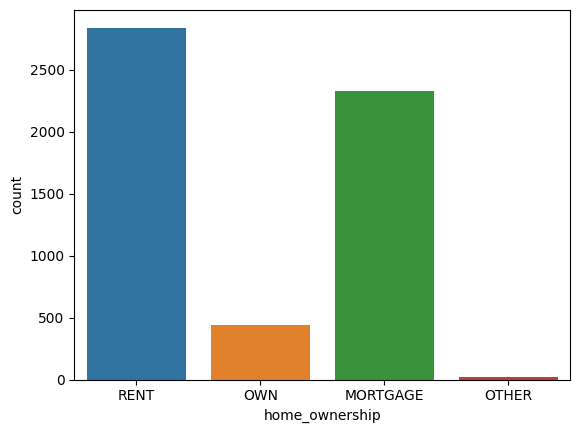

In [ ]:
## Analyzing count of home_ownership
sns.countplot(x="home_ownership",data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='emp_length', ylabel='count'>

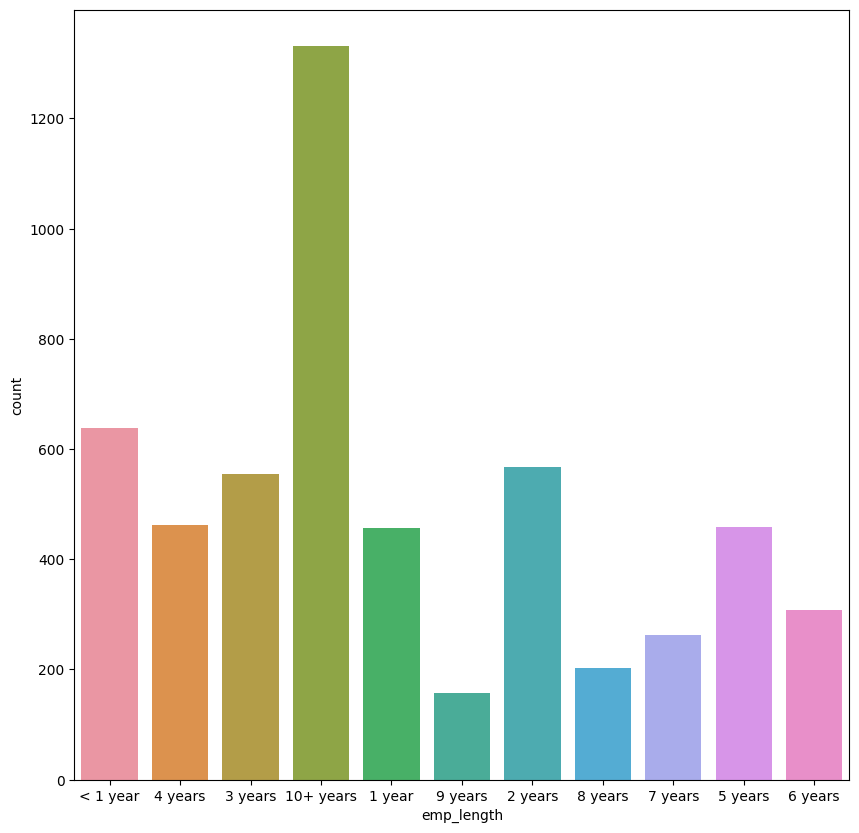

In [ ]:
## Analyzing counts of emp_length
plt.figure(figsize=(10,10))
sns.countplot(x="emp_length",data=loan_data[loan_data['loan_status']=='Charged Off'])


<Axes: xlabel='verification_status', ylabel='count'>

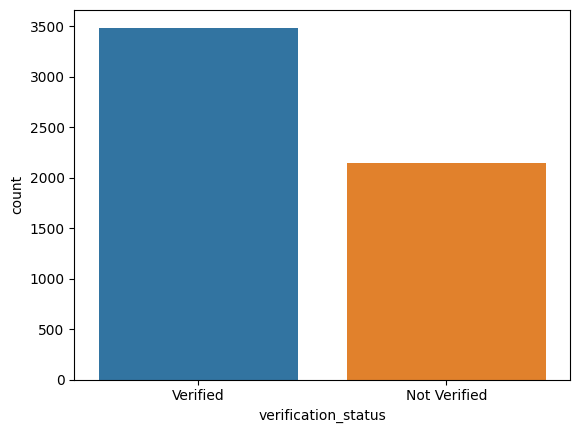

In [ ]:
## Analyzing counts of verification status
# Replacing 'Source Verified' with 'Verifed' as both signifies the same
loan_data['verification_status'].value_counts()
loan_data.replace('Source Verified','Verified',inplace = True)
sns.countplot(x="verification_status",data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='addr_state', ylabel='count'>

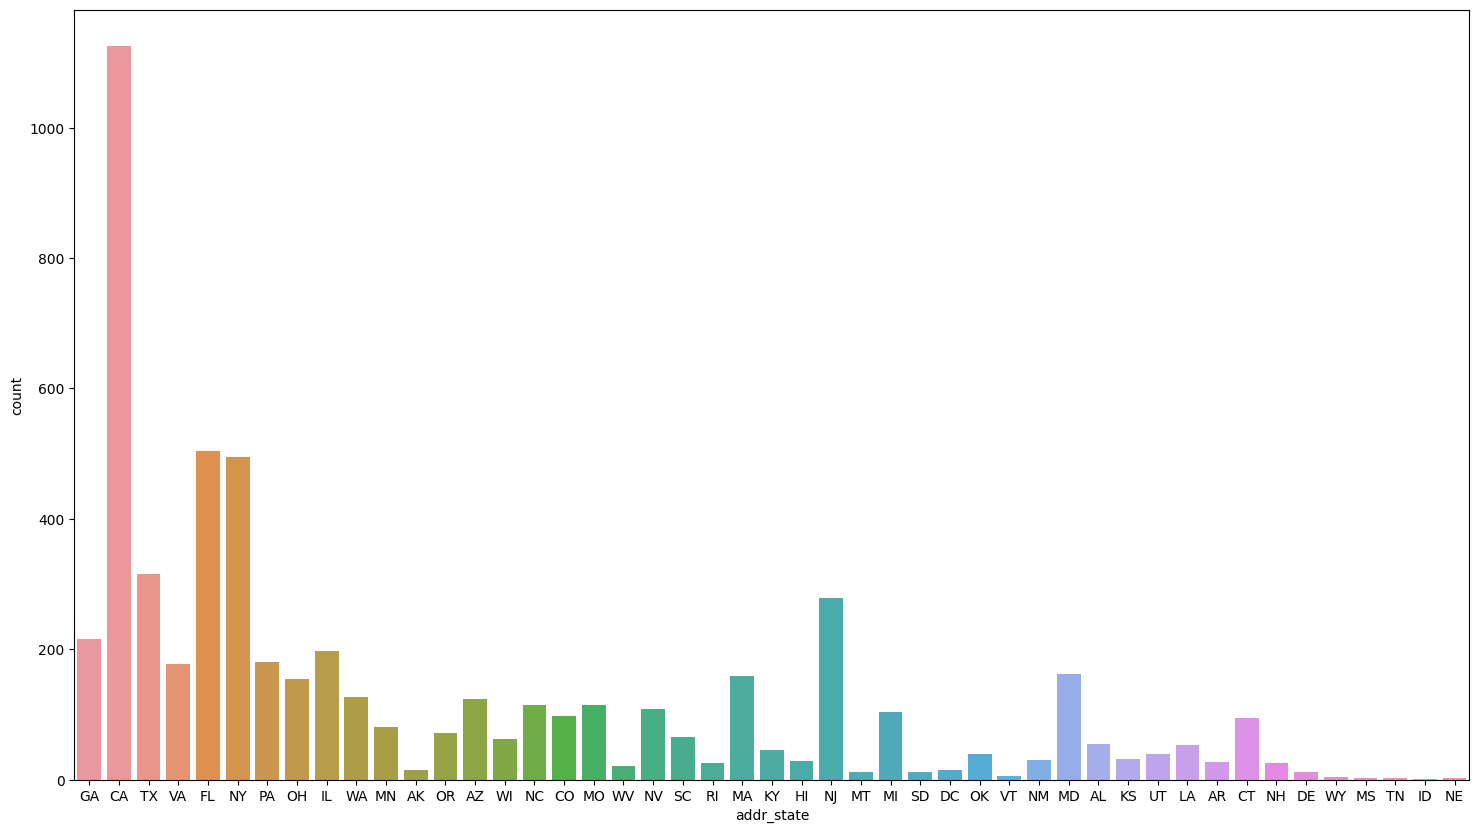

In [ ]:
## Analyzing counts of address
plt.figure(figsize=(18,10))
sns.countplot(x="addr_state",data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='purpose', ylabel='count'>

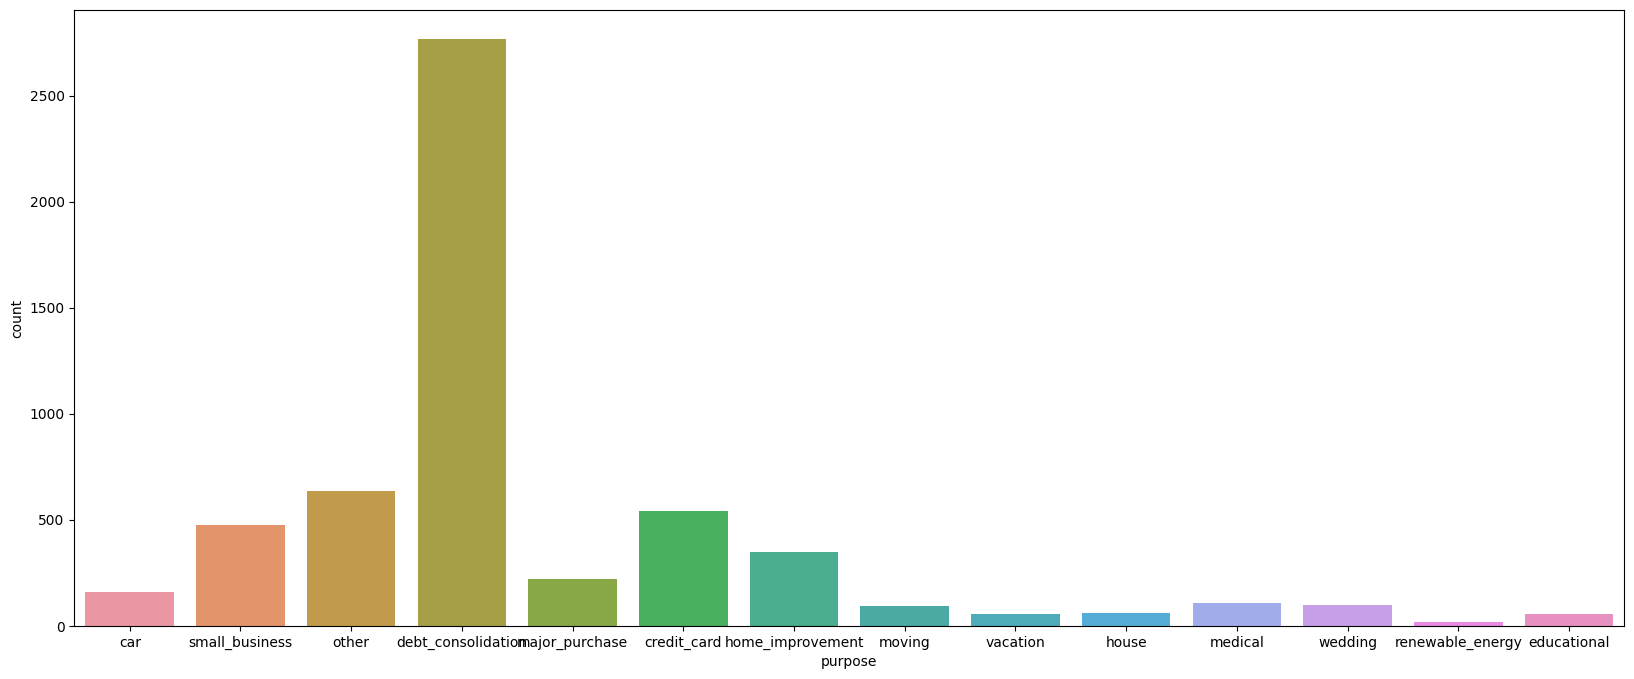

In [ ]:
## Analyzing counts by purpose
plt.figure(figsize=(20,8))
sns.countplot(x="purpose",data=loan_data[loan_data['loan_status']=='Charged Off'])

In [ ]:
loan_data.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [ ]:
loan_data.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

Creating bins to make numerical variable categorical


In [10]:
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], [0, 5, 10, 15, 20, 25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], [0, 25000, 50000, 75000, 100000, 125000,150000],labels =['0-25k','25k-50k','50k-75k','75k-100k','100k-125k','125k-150k'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000,30000,35000],labels =['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,int_rate_groups,dti_groups,annual_inc_groups,loan_amnt_groups
0,1077501,5000,5000,4975.0,10.65,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,1,NaN,10%-15%,25-30,0-25k,0-5k
1,1077430,2500,2500,2500.0,15.27,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,5,NaN,15%-20%,0-5,25k-50k,0-5k
2,1077175,2400,2400,2400.0,15.96,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,NaN,15%-20%,5-10,0-25k,0-5k
3,1076863,10000,10000,10000.0,13.49,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1,35.0,10%-15%,15-20,25k-50k,5k-10k
5,1075269,5000,5000,5000.0,7.90,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,3,NaN,5%-10%,10-15,25k-50k,0-5k


<Axes: xlabel='int_rate_groups', ylabel='count'>

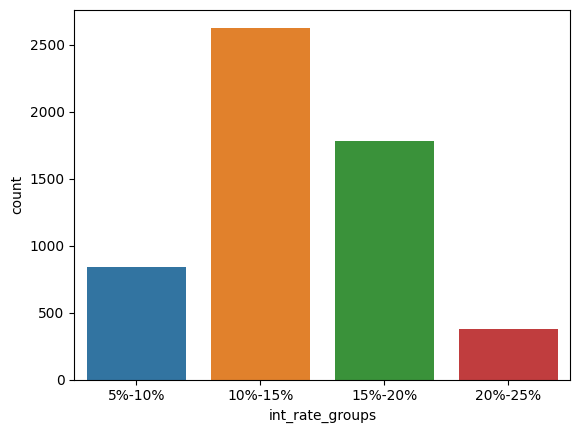

In [ ]:
## Analyzing int_rate_groups
sns.countplot(x="int_rate_groups",data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

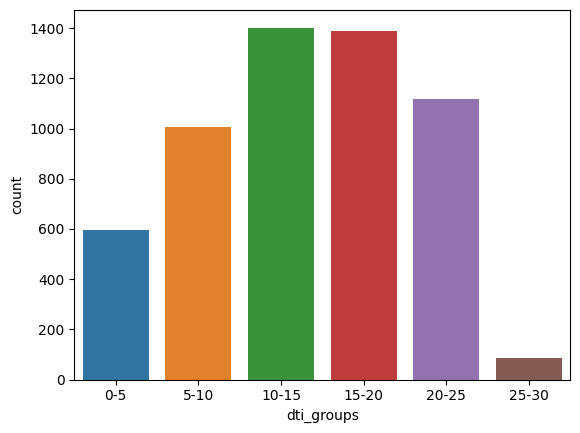

In [ ]:
## Analyzing dti
sns.countplot(x="dti_groups",data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

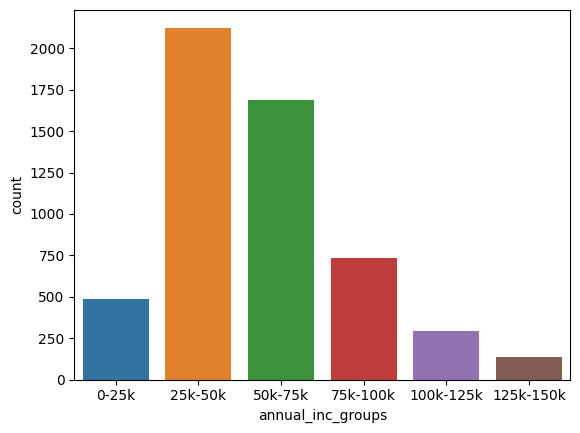

In [ ]:
## Analyzing Annual Income
sns.countplot(x="annual_inc_groups",data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

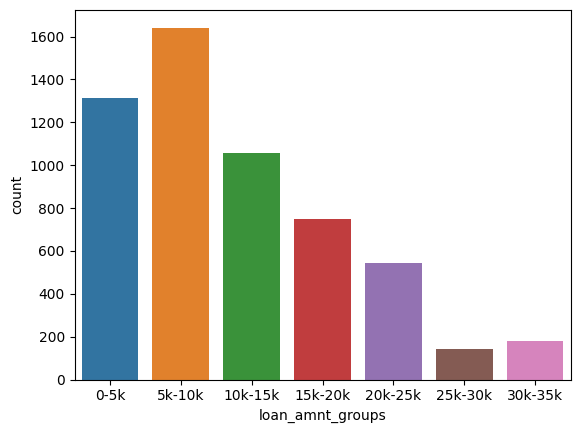

In [11]:
## Analyzing Annual Income
sns.countplot(x="loan_amnt_groups",data=loan_data[loan_data['loan_status']=='Charged Off'])


## OBSERVATIONS:
- Most defaulters are having 'RENT' followed by 'MORTGAGE' as **Home Ownership**
- **Employment Lenth** 10+ Years have the most no. of defaulters
- Most no. of defaulters have **Verification Status** as  'Verified'
- Most no. of defaulters have **Interest Rate** between 10-20%
- Most no. of defaulters have **Annual Income** range between than 25k-50k
- Most no. of defaulters have **Address State** as California
- Loan taken with the **Purpose** of 'debt consolidation’ have the most defaulters.
- Most no. of defaulters have **DTI** between 10-20.



### Bivariate Analysis


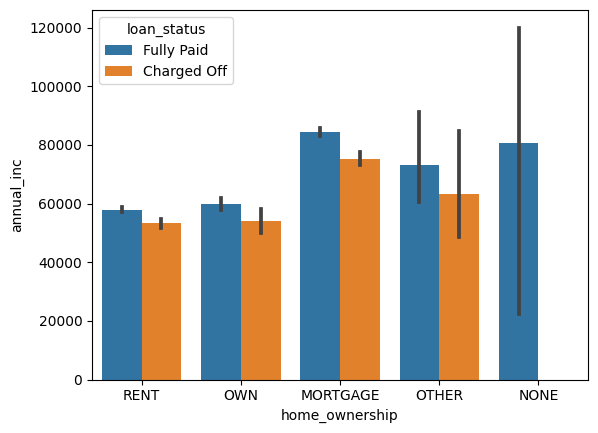

In [ ]:
## Annual income vs home ownership
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status')

<Axes: xlabel='loan_amnt', ylabel='home_ownership'>

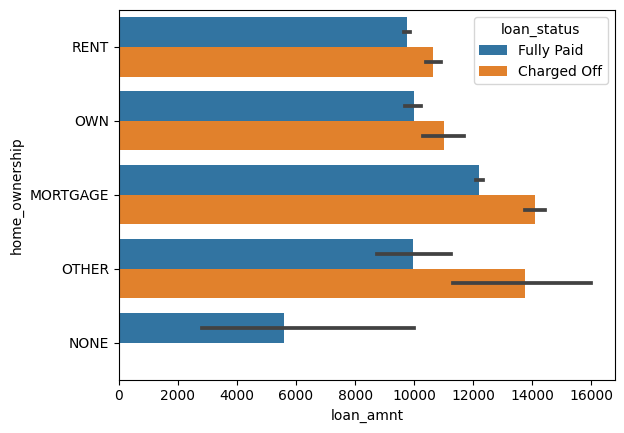

In [ ]:
## Loan amount vs home ownership
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue = 'loan_status')

In [9]:
loan_data[loan_data.loan_status=='Charged Off'].loan_amnt.max()

35000

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

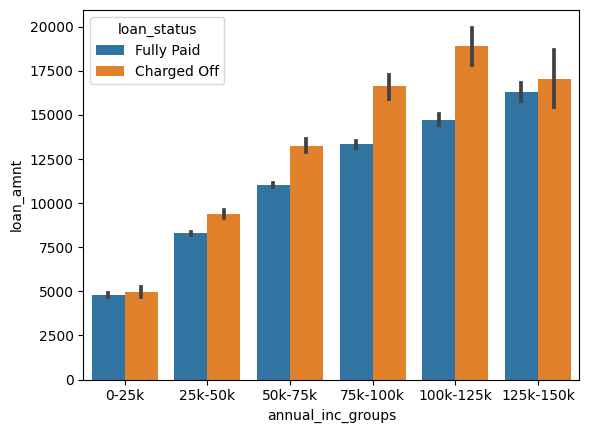

In [ ]:
## Annual income vs loan_amnt
sns.barplot(data =loan_data,x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status')

<Axes: xlabel='int_rate_groups', ylabel='annual_inc'>

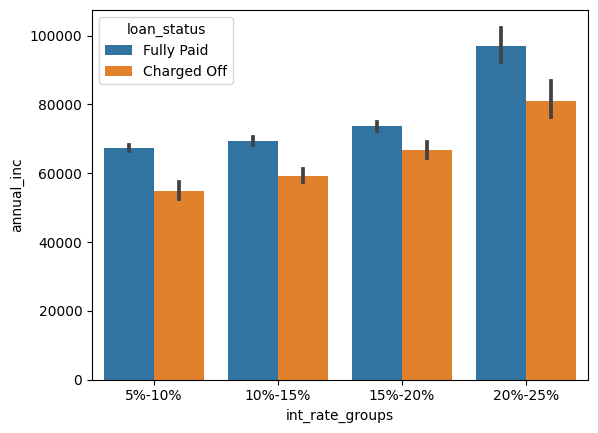

In [ ]:
## Annual income vs int_rate
sns.barplot(data =loan_data,x="int_rate_groups", y="annual_inc", hue = 'loan_status')

<Axes: xlabel='addr_state', ylabel='loan_amnt'>

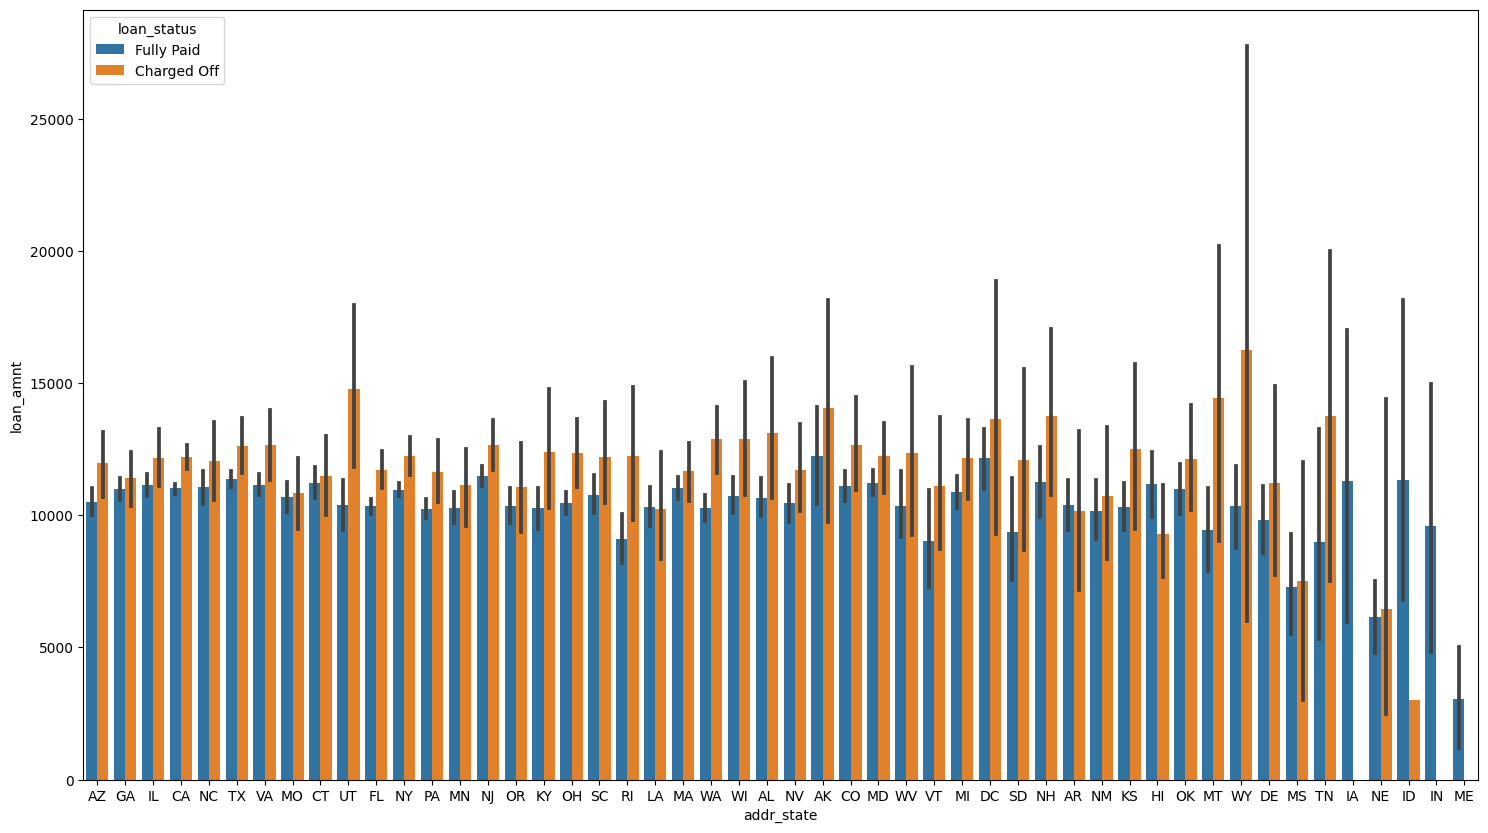

In [ ]:
## Loan amount vs State
plt.figure(figsize=(18,10))
sns.barplot(data =loan_data,x='addr_state', y='loan_amnt', hue ='loan_status')

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

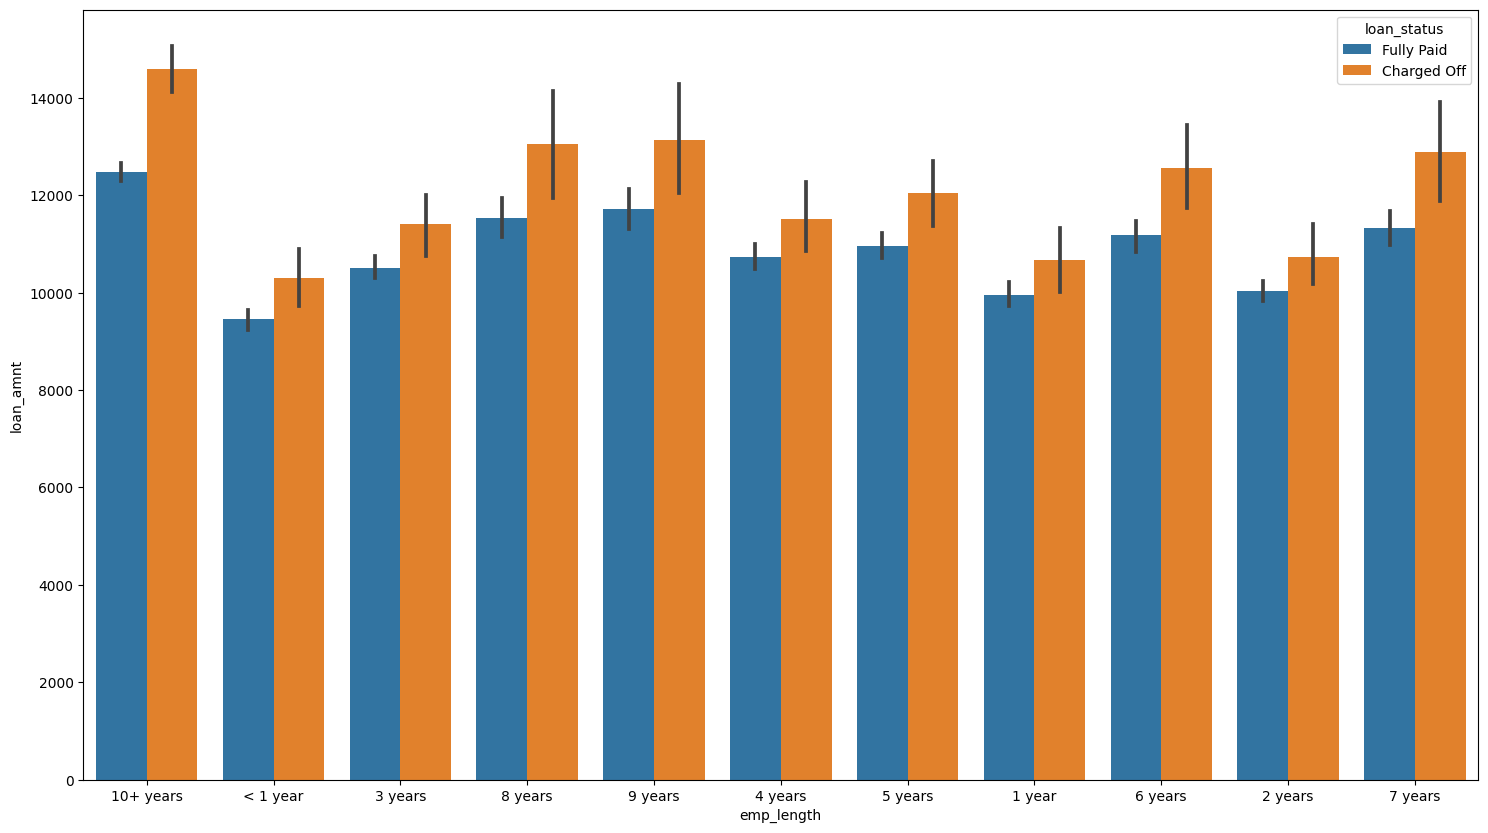

In [ ]:
## Loan Amount vs Employment Length
plt.figure(figsize=(18,10))
sns.barplot(data =loan_data,x='emp_length', y='loan_amnt', hue ='loan_status')

<Axes: xlabel='purpose', ylabel='loan_amnt'>

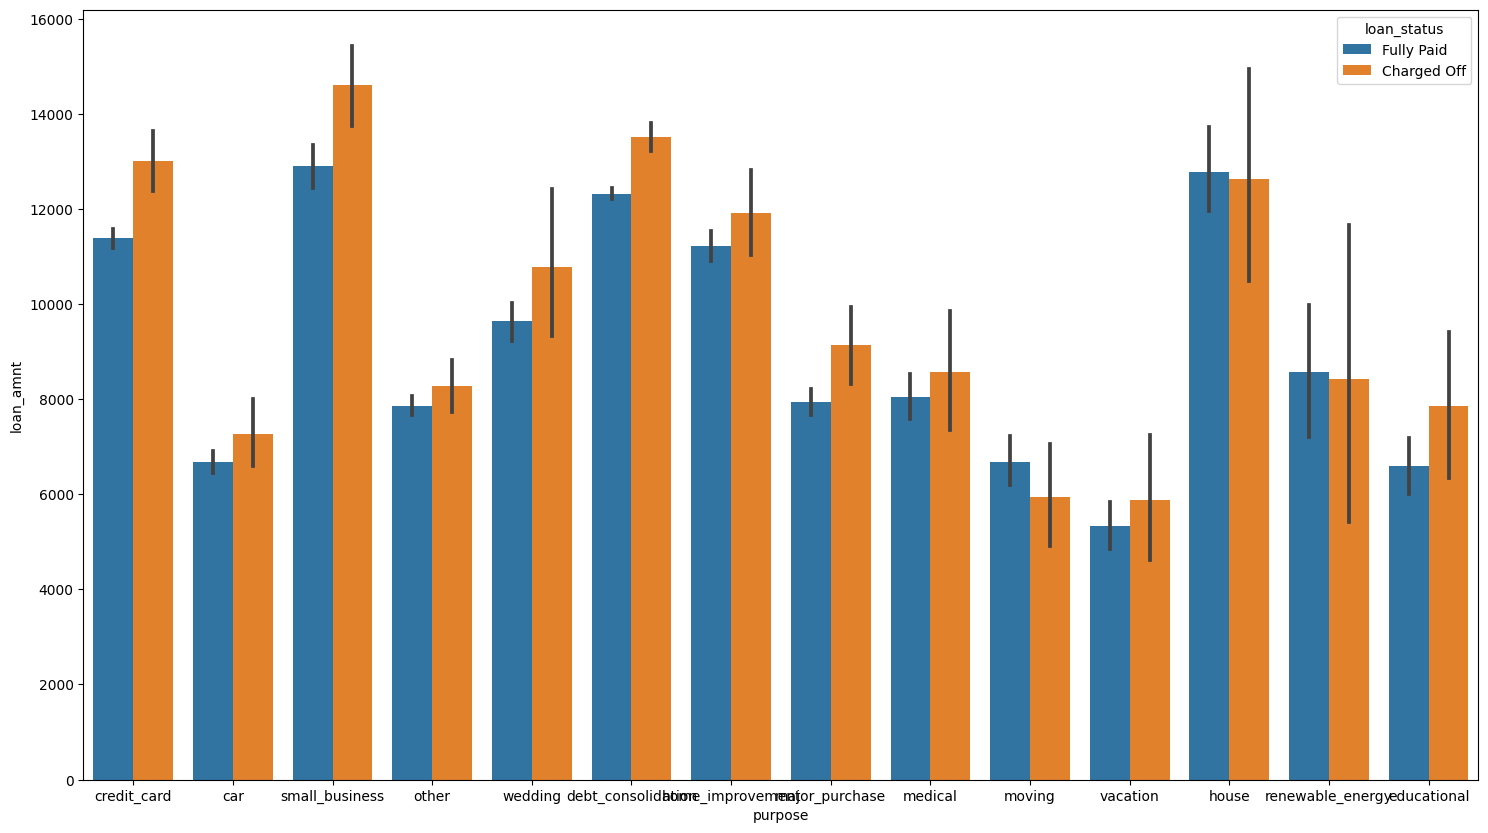

In [ ]:
## Loan Amount vs Purpose
plt.figure(figsize=(18,10))
sns.barplot(data =loan_data,x='purpose', y='loan_amnt', hue ='loan_status')

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

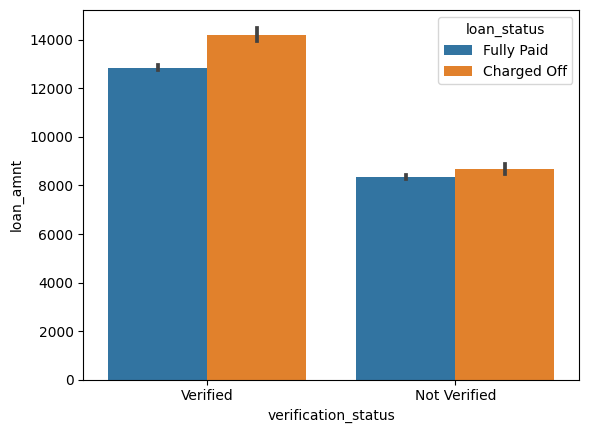

In [ ]:
## Loan Amount vs Verification Status
sns.barplot(data =loan_data,x='verification_status', y='loan_amnt', hue ='loan_status')

<Axes: xlabel='loan_amnt', ylabel='int_rate_groups'>

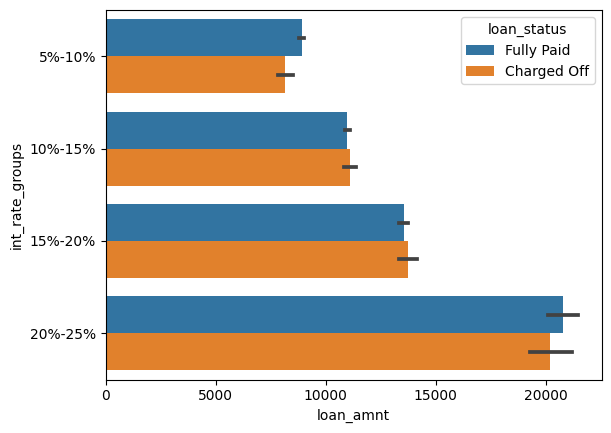

In [ ]:
## Loan Amount vs Int Rate Groups
sns.barplot(data =loan_data,x='loan_amnt', y='int_rate_groups', hue ='loan_status')

<ipython-input-93-ac3150195c1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(reldf.corr(), cmap=sns.diverging_palette(20, 220, n=200),annot=True)


<Axes: >

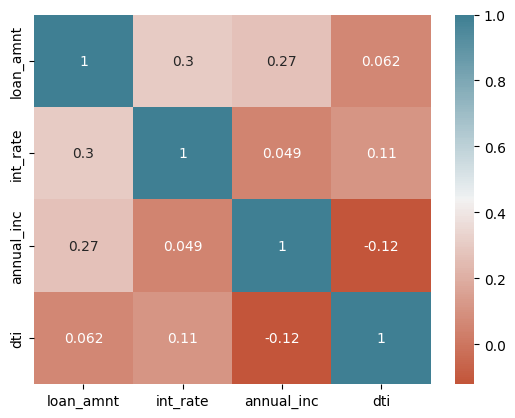

In [ ]:
relloan_data = loan_data.drop(columns=['mths_since_last_delinq','inq_last_6mths','delinq_2yrs','id', 'funded_amnt', 'funded_amnt_inv'])
sns.heatmap(relloan_data.corr(), cmap=sns.diverging_palette(20, 220, n=200),annot=True)

## OBSERVATIONS:
**Other Possibilities of Default **

- **Home Ownership** = 'Mortgage’ & **Annual Income** between 60-70k and **Loan Amount** between 12k-14k has highest defaulters.
- **Annual income** between 100k-125k having **Loan Amount** >150k has higher defaulters.
- **Annual income** between 60k-80k having **Interest Rate** between 20-25% has higher defaulters.
- **Loan Amount** between 12k-14k having **Employment Length** 10+ years has higher defaulters.
- **Loan Amount** between 13k-15k taken with the **Purpose** of ‘Small Business’ has higher defaulters.
- **Loan Amount** between 12k-14k having **Verification Status** as ‘Verified’ has higher defaulters.


